In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Problem 2

In [3]:
data = pd.read_csv('../data/dataset1.csv')
data.head()

,Unnamed: 0,X1,X2,y
0,0,0.107143,0.603070,1
1,1,0.093318,0.649854,1
2,2,0.097926,0.705409,1
3,3,0.155530,0.784357,1
4,4,0.210829,0.866228,1


### Visualize initial data

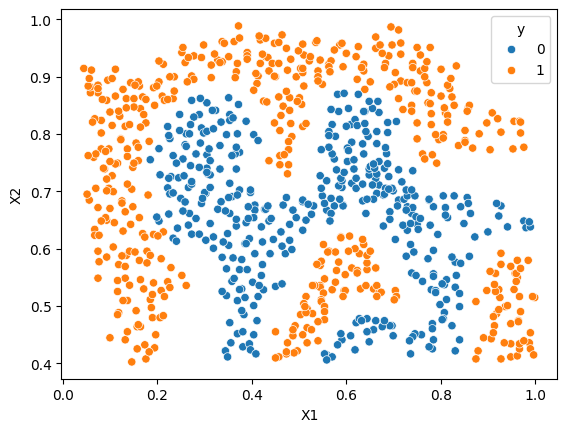

In [4]:
# Visualize initial data
sns.scatterplot(x='X1', y='X2', hue='y', data=data)
plt.show()

###  Train data using `SVM`
Use sklearn's SVM algorithm to train this data set and print out the accuracy score on the trained set.
Visualize prediction results (hint: you can plot the dataset with color range as prediction probability).
Optional: Tune and test SVM's hyperpameters to see if it can achieve > 90% accuracy

In [5]:
# Use sklearn's SVM algorithm to train this data set and print out the accuracy score on the trained set.
X = data[['X1', 'X2']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

Accuracy score on train set: 0.857
Accuracy score on test set: 0.815


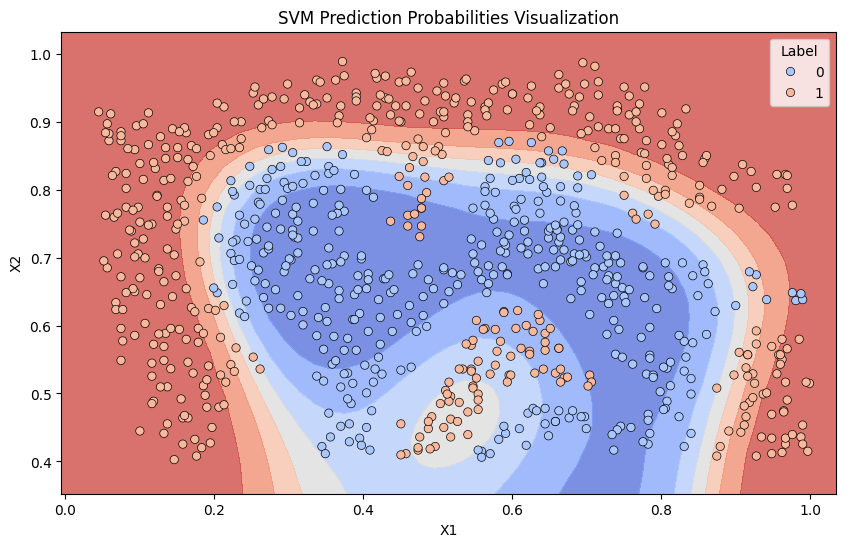

In [6]:
# Visualize the decision boundary

# Function to make a mesh grid for plotting
def make_meshgrid(x, y, h=.02):
    t = x.mean()/10
    x_min, x_max = x.min() - t, x.max() + t
    y_min, y_max = y.min() - t, y.max() + t

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    return xx, yy

# Function to plot the decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Create a mesh grid based on the data
xx, yy = make_meshgrid(X_train['X1'], X_train['X2'])

# Print the accuracy scores
print('Accuracy score on train set: {:.3f}'.format(svm.score(X_train, y_train)))
print('Accuracy score on test set: {:.3f}'.format(svm.score(X_test, y_test)))

# Plot the data points and the prediction probabilities
fig, ax = plt.subplots(figsize=(10,6))
plot_contours(ax, svm, xx, yy, cmap='coolwarm', alpha=0.75)
sns.scatterplot(data=data, x='X1', y='X2', hue='y', palette='coolwarm', edgecolor='k')
plt.title('SVM Prediction Probabilities Visualization')
plt.legend(title='Label')
plt.show()

### Optional: Tune and test SVM's hyperpameters

In [7]:
c_list = [0.01*10**i for i in range(0, 5)]
gamma_list = [0.01*10**i for i in range(0, 5)]
tune_params = {'C': c_list, 'gamma': gamma_list}
tune_params

{'C': [0.01, 0.1, 1.0, 10.0, 100.0], 'gamma': [0.01, 0.1, 1.0, 10.0, 100.0]}

In [8]:
# Using GridSearchCV to find the best parameters
svm_tuned = GridSearchCV(SVC(probability=True), tune_params, scoring='accuracy')
svm_tuned.fit(X_train, y_train)

# Best parameters set found on development set
best_params = svm_tuned.best_params_
best_score = svm_tuned.best_score_

best_params, best_score

({'C': 10.0, 'gamma': 100.0}, 0.9927536231884059)

Accuracy score on train set: 0.99565
Accuracy score on test set: 0.98266


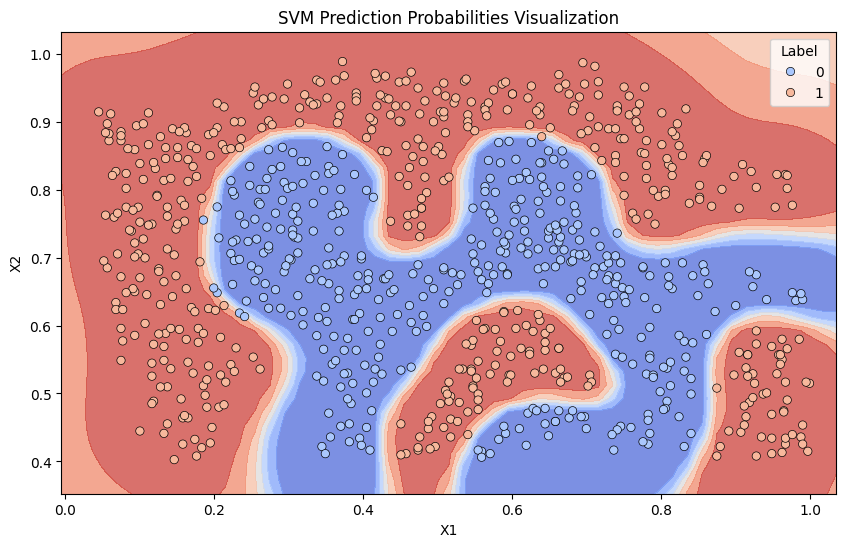

In [9]:
xx, yy = make_meshgrid(X_train['X1'], X_train['X2'])

svm_tuned = SVC(probability=True, **best_params)
svm_tuned.fit(X_train, y_train)

print('Accuracy score on train set: {:.5f}'.format(svm_tuned.score(X_train, y_train)))
print('Accuracy score on test set: {:.5f}'.format(svm_tuned.score(X_test, y_test)))

# Plot the data points and the prediction probabilities
fig, ax = plt.subplots(figsize=(10,6))
plot_contours(ax, svm_tuned, xx, yy, cmap='coolwarm', alpha=0.75)
sns.scatterplot(data=data, x='X1', y='X2', hue='y', palette='coolwarm', edgecolor='k')
plt.title('SVM Prediction Probabilities Visualization')
plt.legend(title='Label')
plt.show()

# Problem 3

In [10]:
dataset = pd.read_csv('../data/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Split the data into train and test set

In [11]:
# Split the data into training and test sets
X = dataset.drop('target', axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

### Train data
Test Logistic Regression, Naive Bayes and SVM algorithms to train on the train set and print classification report for each algorithm.

In [12]:
# Test Logistic Regression, Naive Bayes and SVM algorithms to train on the train set and print classification report for each algorithm.

classifier = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True)
}

for name, clf in classifier.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       108
           1       0.76      0.93      0.84        97

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.85      0.83      0.83       205

Naive Bayes
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       108
           1       0.77      0.88      0.82        97

    accuracy                           0.81       205
   macro avg       0.82      0.82      0.81       205
weighted avg       0.82      0.81      0.81       205

SVM
              precision    recall  f1-score   support

           0       0.74      0.57      0.65       108
           1       0.62      0.77      0.69        97

    accuracy                           0.67       205
   macro avg       0.68      0.67      0.67       205
weighted avg       0.68      0.67     